In [7]:
!pip install bs4 
!pip install requests
!pip install regrex

In [77]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup #primary tool for pulling data out of html and xml files.
import requests
from requests import get
import matplotlib.pyplot as plt

In [47]:

url = "https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=crime&sort=user_rating,desc&ref_=adv_prv" 
headers = {'Accept-Language': 'en-US, en;q=0.5'}
response = get(url)

html_data = requests.get(url).text
html_soup = BeautifulSoup(html_data, 'html5lib')
movie_container = html_soup.find_all('div', class_ = 'lister-item mode-advanced')

#Starting with checking for the details about the first movie. 
first_movie = movie_container[0]   #accesses the movie container for the first index movie
first_name = first_movie.h3.a.text
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold').text
first_imdb = float(first_movie.strong.text)
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
first_votes = first_movie.find('span', attrs = {'name':'nv'}).text


#checking to see movies lacking metascore data
eleventh_movie_mscore = movie_container[10].find('div', class_ = 'ratings-metascore')
#type(eleventh_movie_mscore)   #This should return 'NoneType'


#To extract subsequent pages for more moovie ratings
pages = [str(i) for i in range(1,4)]

for page in pages:
    response = get('https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=crime&sort=user_rating,desc&ref_=adv_prv' + page, headers = headers)
    
    page_html = BeautifulSoup(response.text, 'html5lib')
    mv_container = page_html.find_all('div', class_ = 'lister-item mode-advanced')
    for container in mv_container:
        if container.find('div', class_ = 'ratings-metascore') is not None:
    #adding the name
            name = container.h3.a.text 
            names.append(name)
        #adding the year
            year = container.h3.find('span', class_ = 'lister-item-year').text 
            years.append(year)
    #adding the imdb ratings
            imdb = float(container.strong.text)
            imdb_ratings.append(imdb)
    #adding the metascore
            metascore = container.find('span', class_ = 'metascore').text
            metascores.append(int(metascore))
    #adding the vote
            vote = container.find('span', attrs = {'name':'nv'}).text
            votes.append(vote)

movie_ratings =pd.DataFrame({'movies': names, 
'year' : years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes})

print(movie_ratings.info())
movie_ratings.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movies     330 non-null    object 
 1   year       330 non-null    object 
 2   imdb       330 non-null    float64
 3   metascore  330 non-null    int64  
 4   votes      330 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.0+ KB
None


,movies,year,imdb,metascore,votes
0,Der Pate,(1972),9.2,100,"1,639,073"
1,The Dark Knight,(2008),9.0,84,"2,329,575"
2,Der Pate 2,(1974),9.0,90,"1,141,793"
3,Die zwölf Geschworenen,(1957),9.0,96,"698,364"
4,Pulp Fiction,(1994),8.9,94,"1,844,611"
5,GoodFellas - Drei Jahrzehnte in der Mafia,(1990),8.7,90,"1,032,057"
6,City of God,(2002),8.6,79,"704,379"
7,The Green Mile,(1999),8.6,61,"1,160,869"
8,Sieben,(1995),8.6,65,"1,461,428"
9,Das Schweigen der Lämmer,(1991),8.6,85,"1,285,095"


                        Processing the scraped data

In [79]:
movie_ratings = movie_ratings[['movies', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movies,year,imdb,metascore,votes
0,Der Pate,1972,9.2,100,"1,639,073"
1,The Dark Knight,2008,9.0,84,"2,329,575"
2,Der Pate 2,1974,9.0,90,"1,141,793"
3,Die zwölf Geschworenen,1957,9.0,96,"698,364"
4,Pulp Fiction,1994,8.9,94,"1,844,611"


In [70]:
#saved this data locally as:
movie_ratings.to_csv('crime_movies_ratings.csv')

In [83]:
%matplotlib inline

In [87]:
x = movie_ratings['imdb']
n_imdb = 100 * x
n_imdb.head()

0    920.0
1    900.0
2    900.0
3    900.0
4    890.0
Name: imdb, dtype: float64

Text(0.5, 1.0, 'votes')

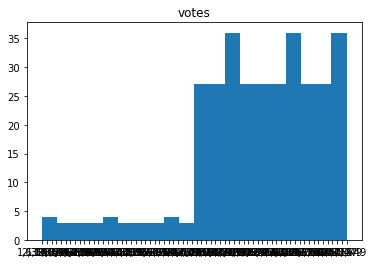

In [109]:
plt.hist(movie_ratings['votes'], bins = 20)
plt.title('votes')

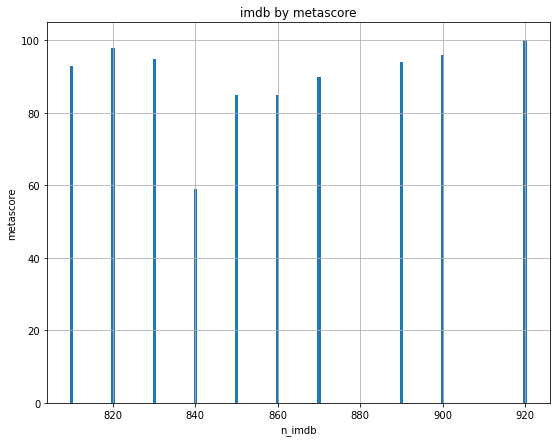

In [97]:
plt.figure(figsize=(9,7))
plt.bar(n_imdb, movie_ratings['metascore'])
plt.title('imdb by metascore')
plt.xlabel('n_imdb')
plt.ylabel('metascore')
plt.grid(True)
plt.show()